In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict,cross_val_score


from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import random as rnd
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [2]:
y.shape

(70000,)

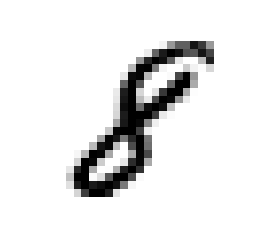

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[7777]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

plt.axis('off')
plt.show()


In [4]:
y[7777]


'8'

In [5]:
F

In [6]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]



In [7]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)



array([[52670,  1909],
       [ 1783,  3638]], dtype=int64)

In [9]:
precision_score(y_train_5, y_train_pred)

0.6558500090138814

In [10]:
recall_score(y_train_5, y_train_pred)

0.6710938941154768

In [11]:
f1_score(y_train_5, y_train_pred)

0.6633843909555068

In [12]:
#threshold = 200000

In [13]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
            method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)



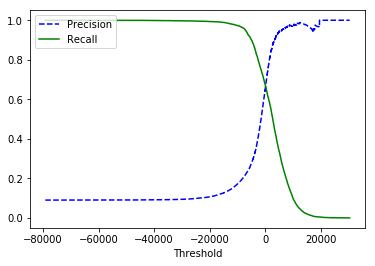

In [14]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [15]:
#if we want 90% precision rate

y_train_pred_90 = (y_scores > 4000)

In [16]:
precision_score(y_train_5,y_train_pred_90)

0.9237649063032368

In [17]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [18]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
    

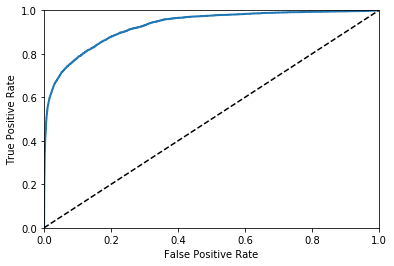

In [19]:
plot_roc_curve(fpr, tpr)
plt.show()

In [20]:
roc_auc_score(y_train_5, y_scores)#use rock when you care more about the false negatives 
#and use PR when you caremoreabout the false positives

0.9288719310587157

In [21]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

C:\Users\alex_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alex_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alex_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
y_score_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

NameError: name 'y_scores_forest' is not defined

NameError: name 'fpr_forest' is not defined

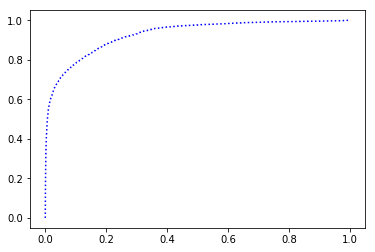

In [23]:
%matplotlib inline
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_score_forest)

In [ ]:
sgd_clf.fit(X_train, y_train)

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
#some_digit_scores
np.argmax(some_digit_scores)

In [ ]:
sgd_clf.classes_

In [ ]:
forest_clf.fit(X_train, y_train)

In [ ]:
forest_clf.predict([some_digit])

In [ ]:
forest_clf.predict_proba([some_digit])

In [24]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88167367, 0.88379419, 0.88228234])

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
#Multilabel Classification
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [0]:
knn_clf.predict([some_digit])

array([[ True, False]])

In [0]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

KeyboardInterrupt: ignored

In [0]:
#Multioutput Classification
noise = rnd.randint(0, 100, (len(X_train), 784))
noise = rnd.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

TypeError: ignored

In [0]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[7777]])
plot_digit(clean_digit)